In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# LIBRARIES:

import os
import re
import numpy as np
import pandas as pd
#import dotenv
import matplotlib.pyplot as plt

## Local Config

In [ ]:
# CONFIGURATIONS:


dotenv.load_dotenv()
santi_project_path = os.getenv("santi_project_path")
print("santi_project_path:", santi_project_path)

dataset_images_path = "/1_DataSet/1_DataSet/"
dataset_images_path_data = "/2_EDA_Data_Processing/imagenes.npy"
metadata_path = "/2_EDA_Data_Processing/df_dataset_metadatos.csv"


imagenes_path = f"{santi_project_path}/{dataset_images_path_data}"
metadata_path = f"{santi_project_path}/{metadata_path}"


NameError: name 'dotenv' is not defined

## Google Config

In [3]:
imagenes_pickle_path = "/content/drive/MyDrive/MNA_NAV_AUT/imagenes.pkl"
metadata_pickle_path = "/content/drive/MyDrive/MNA_NAV_AUT/df_dataset_metadatos.pkl"



In [4]:
# DOCUMENTATION:
## READING DATA

try:
  array_imagenes = np.load(imagenes_path, allow_pickle=True)
  print("array_imagenes shape:", array_imagenes.shape)

  df_dataset_metadatos = pd.read_csv(metadata_path)
  print("df_dataset_metadatos shape:", df_dataset_metadatos.shape)

except:
    import pickle

    # Cargar imagenes.pkl
    with open(imagenes_pickle_path, 'rb') as f:
        array_imagenes = pickle.load(f)
    print("array_imagenes shape:", np.array(array_imagenes).shape)

    # Cargar df_dataset_metadatos.pkl
    with open(metadata_pickle_path, 'rb') as f:
        df_dataset_metadatos = pickle.load(f)
    print("df_dataset_metadatos shape:", df_dataset_metadatos.shape)



array_imagenes shape: (31711, 66, 200, 3)
df_dataset_metadatos shape: (31711, 4)


In [5]:
# NOTE:
# DATA PREPARATION:

# Ready to Consume.
array_imagenes


# To extract radians from df, need to take the column radianes
radiantes_reg = []

for index, row in df_dataset_metadatos.iterrows():
    radianes = row['radianes']
    # hacer float, redondeando a 4 decimales
    radianes = float(radianes)
    radianes = round(radianes, 4)
    radiantes_reg.append(radianes)


In [6]:
# VALIDATION:
print("Number of images:", len(array_imagenes))
print("Number of radiantes:", len(radiantes_reg))


print("First 5 radiantes:", radiantes_reg[:5])
df_dataset_metadatos.head()


Number of images: 31711
Number of radiantes: 31711
First 5 radiantes: [0.004, -0.006, -0.004, 0.05, 0.014]


,indice,path_image,direccion,radianes
0,0,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.004
1,1,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.006
2,2,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.004
3,3,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.050
4,4,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.014


# DEEP LEARNING:

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping



In [8]:

# DATA PROCESSING:
array_imagenes = np.array(array_imagenes)  # Convierte la lista a np.ndarray

array_imagenes_norm = array_imagenes/255
labels = np.array(radiantes_reg)




X_train, X_test, y_train, y_test = train_test_split(array_imagenes_norm, labels, test_size=0.2, random_state=42, shuffle=True )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

"""

# important ! the ram exeded 26, so the limited  (12ram) gpu was to much,
# have to exported and loaded afterwards
output_dir = '/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED'
os.makedirs(output_dir, exist_ok=True)

np.save(os.path.join(output_dir, 'X_train.npy'), X_train)
np.save(os.path.join(output_dir, 'X_test.npy'), X_test)
np.save(os.path.join(output_dir, 'y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'y_test.npy'), y_test)

print(f"Archivos guardados en: {output_dir}")
"""


(25368, 66, 200, 3) (6343, 66, 200, 3) (25368,) (6343,)


'\n\n# important ! the ram exeded 26, so the limited  (12ram) gpu was to much,\n# have to exported and loaded afterwards\noutput_dir = \'/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED\'\nos.makedirs(output_dir, exist_ok=True)\n\nnp.save(os.path.join(output_dir, \'X_train.npy\'), X_train)\nnp.save(os.path.join(output_dir, \'X_test.npy\'), X_test)\nnp.save(os.path.join(output_dir, \'y_train.npy\'), y_train)\nnp.save(os.path.join(output_dir, \'y_test.npy\'), y_test)\n\nprint(f"Archivos guardados en: {output_dir}")\n'

In [9]:
"""

output_dir = '/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED'



X_train = np.load(os.path.join('/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED/X_train.npy'))


y_train = np.load(os.path.join(output_dir, 'y_train.npy'))




X_test = np.load(os.path.join(output_dir, 'X_test.npy'))
y_test = np.load(os.path.join(output_dir, 'y_test.npy'))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

"""

"\n\noutput_dir = '/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED'\n\n\n\nX_train = np.load(os.path.join('/content/drive/MyDrive/MNA_NAV_AUT/TRANS_SPLITED/X_train.npy'))\n\n\ny_train = np.load(os.path.join(output_dir, 'y_train.npy'))\n\n\n\n\nX_test = np.load(os.path.join(output_dir, 'X_test.npy'))\ny_test = np.load(os.path.join(output_dir, 'y_test.npy'))\n\nprint(X_train.shape, X_test.shape, y_train.shape, y_test.shape)\n\n"

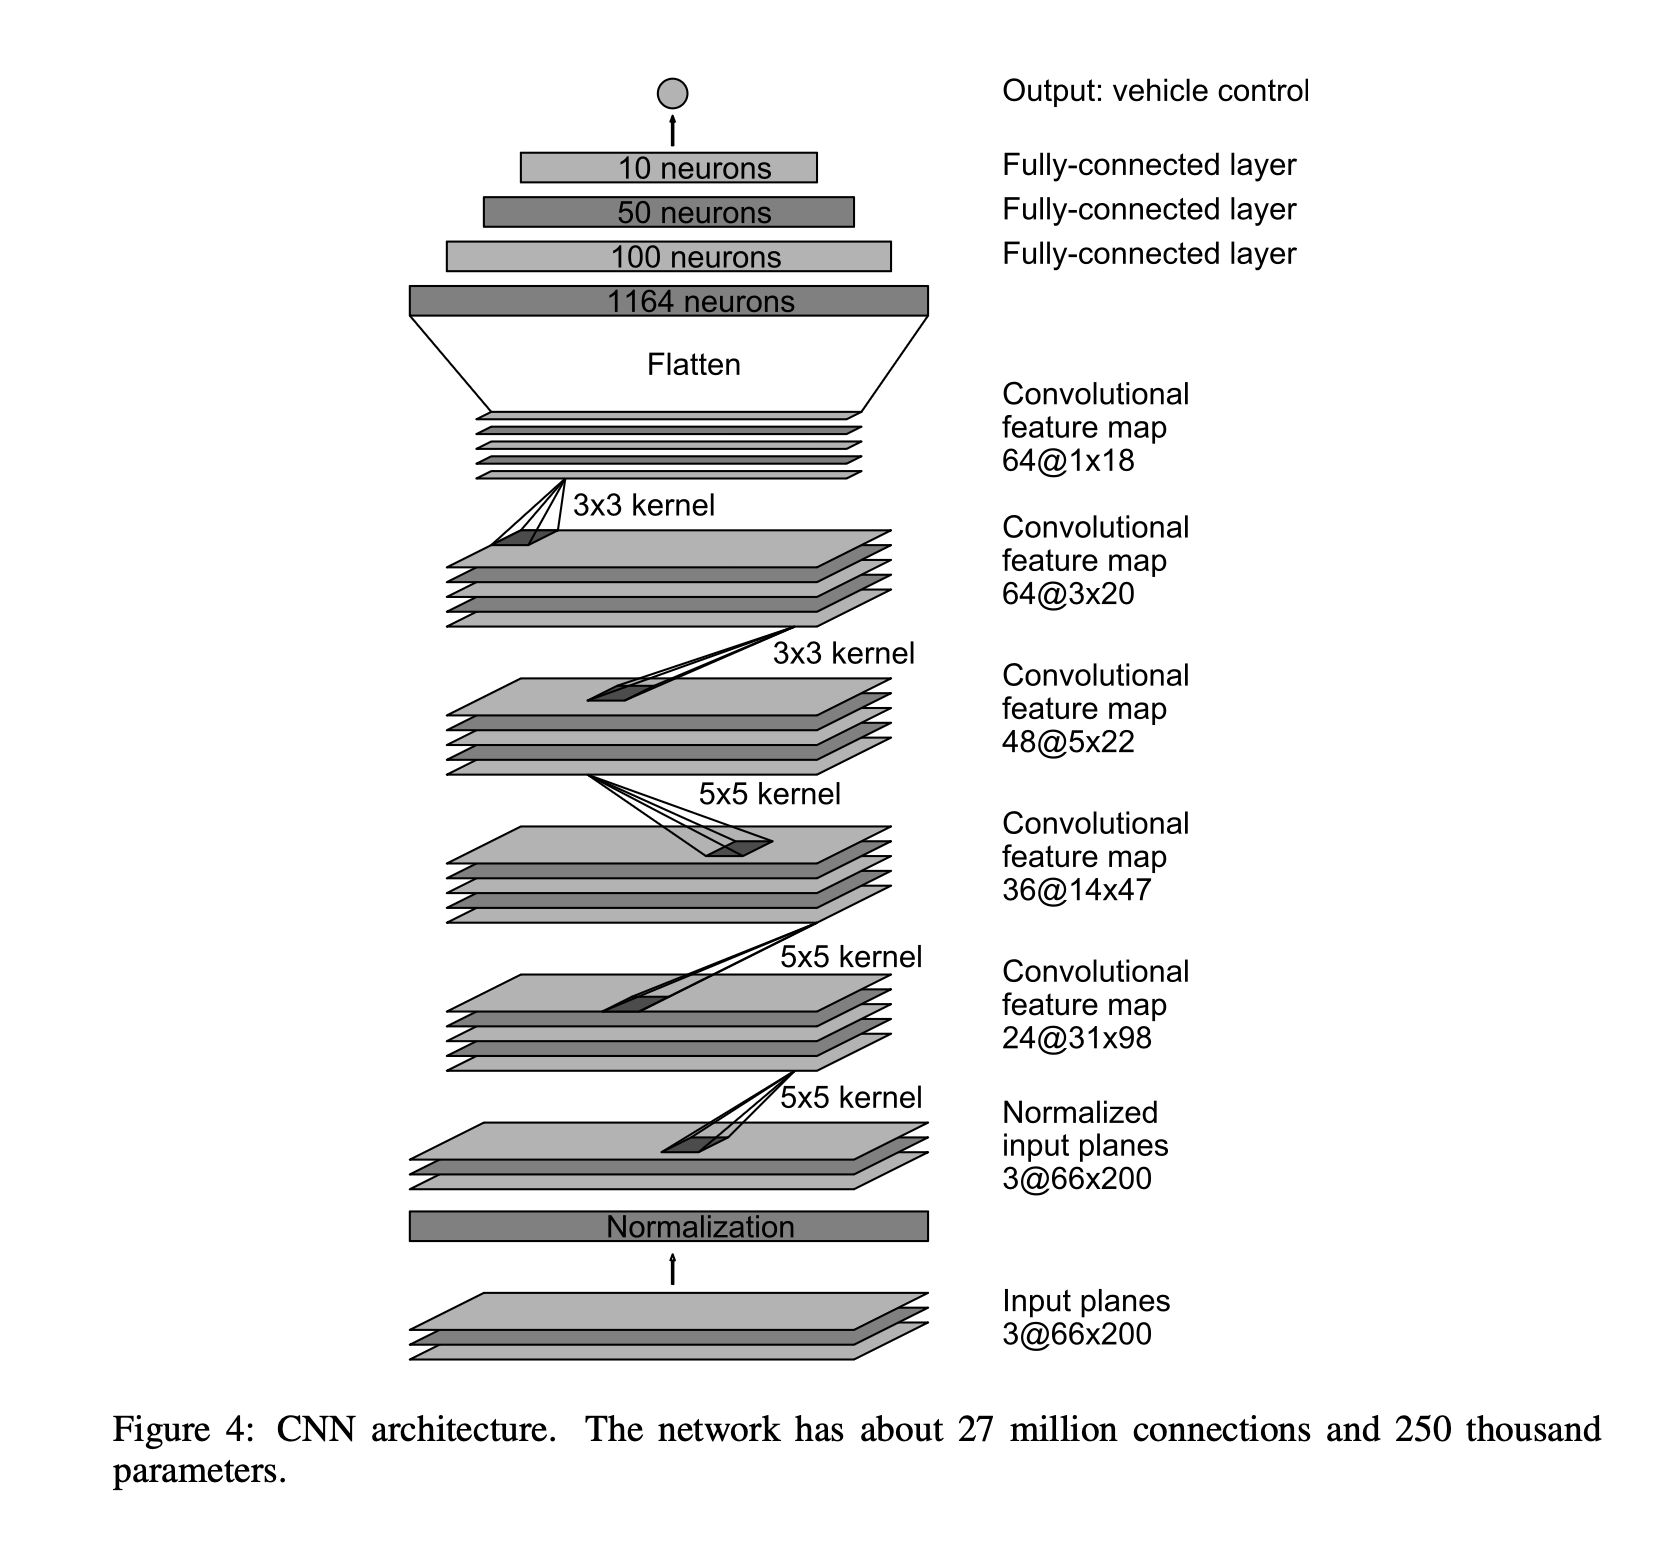

In [11]:
# DOCUMENTATION:

# subNOTE:          1:
# Capa de entrada y Normalización
# El paper indica que la entrada son 3 planos de 66x200 (YUV).
# La primera capa normaliza los datos. Usamos Rescaling para escalar los
# valores de los píxeles (ej. de [0, 255] a [0, 1]).

# subNOTE:          2:
# Inicio de las capas convolucionales
# El paper describe 5 capas convolucionales. Las primeras 3 usan un
# stride de 2x2 y un kernel de 5x5.

# subNOTE:          3:
# Las últimas 2 capas convolucionales no tienen stride y usan un kernel de 3x3.
# # Aplanado (Flatten) para conectar con las capas densas

# subNOTE:          4:
# Capas totalmente conectadas (Dense)
# El paper describe 3 capas totalmente conectadas antes de la salida.

# subNOTE:          5:
# Capa de salida
# Es una sola neurona sin función de activación (lineal), ya que es un
# problema de regresión para predecir el ángulo de giro.

In [11]:
model = keras.Sequential([
    # subNOTE:          1:
    layers.Input(shape=(66,200,3)), # Esta es mi entrada de imagenes, ya estan normalizadas

    # subNOTE:          2:
    layers.Conv2D(24, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    layers.Conv2D(36, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    layers.Conv2D(48, kernel_size=(5, 5), strides=(2, 2), activation='relu'),

    # subNOTE:          3:
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # subNOTE:          4:
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='relu'),

    # subNOTE:          5:
    layers.Dense(1)
])


In [12]:
model.compile(
        loss='mean_squared_error',
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=['mae']
    )

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0011 - mae: 0.0243 - val_loss: 4.6122e-04 - val_mae: 0.0158
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.8010e-04 - mae: 0.0161 - val_loss: 3.4749e-04 - val_mae: 0.0136
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5559e-04 - mae: 0.0139 - val_loss: 3.2357e-04 - val_mae: 0.0131
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.9467e-04 - mae: 0.0126 - val_loss: 2.7635e-04 - val_mae: 0.0122
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.4684e-04 - mae: 0.0115 - val_loss: 2.4641e-04 - val_mae: 0.0118
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.1565e-04 - mae: 0.0108 - val_loss: 1.9436e-04 - val_mae: 0.0103
Epoch 7/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.9250e-04 - mae: 0.0100 - val_loss: 2.1348e-04 - val_mae: 0.0107
Epoch 8/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.7712e-04 - mae: 0.0096 - val_loss: 2.0281e-04 - val_mae: 0

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6085e-05 - mae: 0.0068
Test Loss: 0.0001
Test MAE: 0.0066

Cantidad de muestras en TRAIN: 25368
Cantidad de muestras en TEST: 6343
Gráfica de métricas guardada exitosamente en: /content/drive/MyDrive/MNA_NAV_AUT/MODELS/num_3/MODELO_3_METRICAS.png

--- Métricas finales ---
Train Loss final: 0.0001
Val Loss final: 0.0001
Train MAE final: 0.0057
Val MAE final: 0.0067
Test Loss: 0.0001
Test MAE: 0.0066


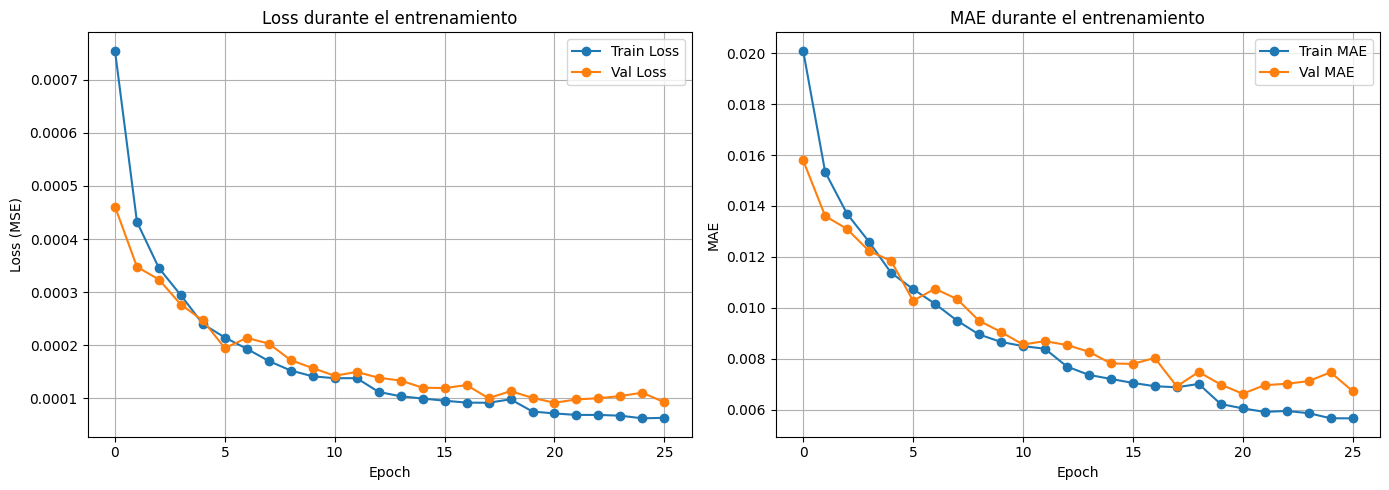

In [17]:
# Evaluación del modelo
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Mostrar cantidad de muestras en train y test
print(f"\nCantidad de muestras en TRAIN: {X_train.shape[0]}")
print(f"Cantidad de muestras en TEST: {X_test.shape[0]}")

# Gráficas de entrenamiento y validación
plt.figure(figsize=(14, 5))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Val MAE', marker='o')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()

# --- Guardar las imágenes ---

NUM_MODELO = "3"

image_save_path = f'/content/drive/MyDrive/MNA_NAV_AUT/MODELS/num_{NUM_MODELO}'

os.makedirs(image_save_path, exist_ok=True)

# This is the line that saves the current figure to a file
plt.savefig(os.path.join(image_save_path, f'MODELO_{NUM_MODELO}_METRICAS.png'))
print(f"Gráfica de métricas guardada exitosamente en: {os.path.join(image_save_path, f'MODELO_{NUM_MODELO}_METRICAS.png')}")


# Mostrar métricas finales
print("\n--- Métricas finales ---")
print(f"Train Loss final: {history.history['loss'][-1]:.4f}")
print(f"Val Loss final: {history.history['val_loss'][-1]:.4f}")
print(f"Train MAE final: {history.history['mae'][-1]:.4f}")
print(f"Val MAE final: {history.history['val_mae'][-1]:.4f}")
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Optionally, you can call plt.show() here if you also want to display the plot

plt.show()

In [18]:
# --- Guardar el modelo ---
# Define la ruta para guardar el modelo en Google Drive
model_save_path = f'/content/drive/MyDrive/MNA_NAV_AUT/MODELS/num_{NUM_MODELO}/MODEL_{NUM_MODELO}.h5'

# Asegúrate de que la carpeta de modelos exista
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)


# Guarda el modelo
model.save(model_save_path)

print(f"Modelo guardado exitosamente en: {model_save_path}")

Modelo guardado exitosamente en: /content/drive/MyDrive/MNA_NAV_AUT/MODELS/num_3/MODEL_3.h5
